# Scientific visualisation with pyvista

## Installation:

conda install -c conda-forge pyvista

pip install pyvista

pip install ipyvtklink

In [32]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mesh = pv.read("/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/computational-physics-1/unit-2/TURB_DRIVE_SUP/data.0010.vtk")

In [3]:
print(mesh)

RectilinearGrid (0x1218912f0)
  N Cells:	2500
  N Points:	2601
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	51, 51, 1
  N Arrays:	5



In [4]:
mesh.dimensions

(51, 51, 1)

In [5]:
mesh.n_cells

2500

In [6]:
mesh.n_points

2601

In [7]:
mesh.n_arrays

5

In [8]:
mesh.bounds

(-2.0, 2.0, -2.0, 2.0, 0.0, 0.0)

In [9]:
mesh.center

[0.0, 0.0, 0.0]

In [10]:
mesh.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [16]:
mesh.dimensions

(51, 51, 1)

In [18]:
mesh.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32  (2500,)              SCALARS
    vx1                     float32  (2500,)
    vx2                     float32  (2500,)
    Bx1                     float32  (2500,)
    Bx2                     float32  (2500,)

In [22]:
#mesh.meshgrid

In [24]:
rho1 = pv.get_array(mesh, "rho", preference='cell')

In [25]:
print(rho1.shape)

(2500,)


In [34]:
rho1_2D = rho1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [35]:
print(rho1_2D.shape)

(50, 50)


## Grid

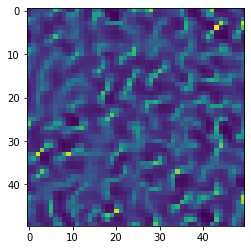

In [52]:
%matplotlib inline

plt.imshow(rho1_2D)

In [55]:
from mpl_toolkits.axes_grid1 import ImageGrid

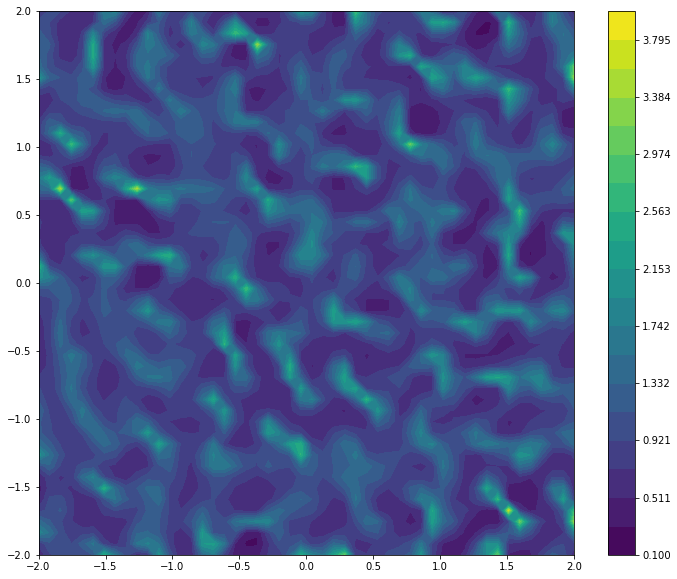

In [72]:
x = np.linspace(-2, +2, 50)
y = np.linspace(-2, +2, 50)


X, Y = np.meshgrid(x, y)


plt.figure(figsize = (12,10))

Z = plt.contourf(X, Y, rho1_2D, levels = np.linspace(0.1, 4.0, 20))

plt.colorbar(Z)

plt.show()

In [74]:
vx1 = pv.get_array(mesh, "vx1", preference='cell')

vx2 = pv.get_array(mesh, "vx2", preference='cell')

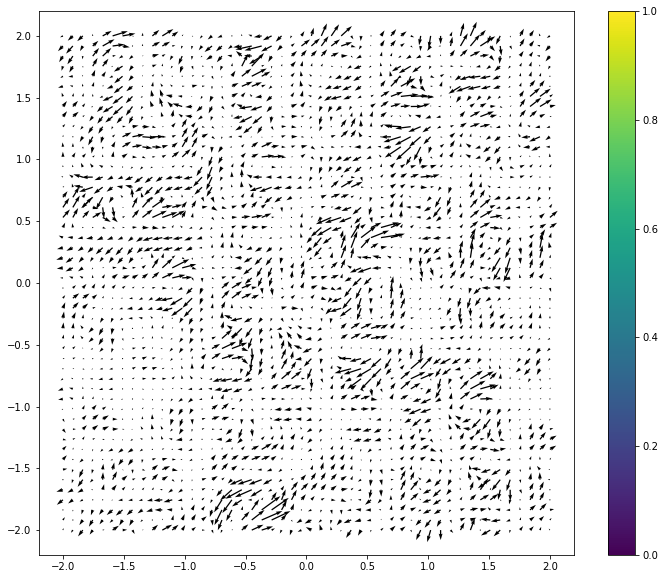

In [79]:
plt.figure(figsize = (12,10))
Z1 = plt.quiver(X, Y, vx1, vx2)
plt.colorbar(Z1)
plt.show()

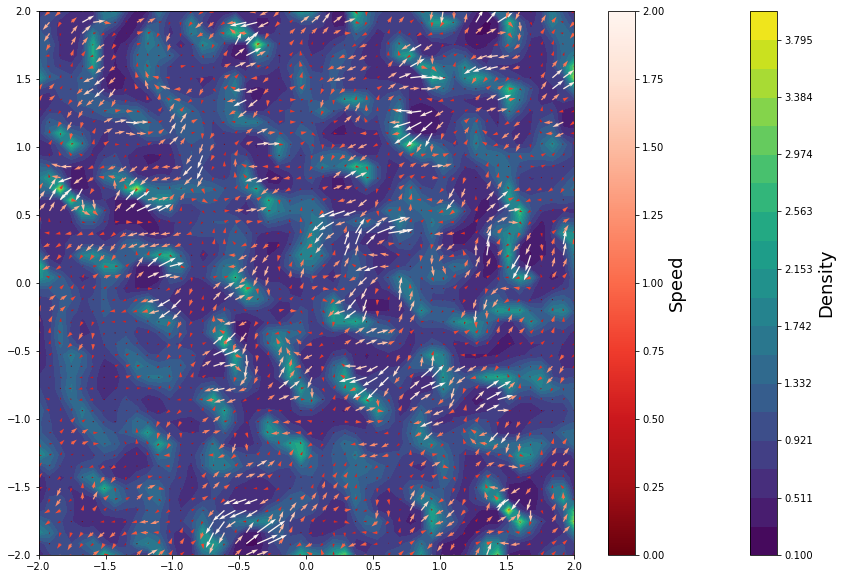

In [100]:
plt.figure(figsize = (15,10))

Z = plt.contourf(X, Y, rho1_2D, levels = np.linspace(0.1, 4.0, 20))
Z1 = plt.quiver(X, Y, vx1, vx2, np.sqrt(vx1**2 + vx2**2), cmap = 'Reds_r', clim = (0,2))

CB1 = plt.colorbar(Z)
CB2 = plt.colorbar(Z1)

CB1.set_label('Density', size=18)
CB2.set_label('Speed', size=18)

plt.show()

In [104]:
from astropy.io import ascii

In [107]:
times_file = "/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/computational-physics-1/unit-2/TURB_DRIVE_SUP/vtk.out"

In [108]:
times = ascii.read(times_file)

In [112]:
#print(times)

# Times
times = ascii.read(times_file)
times = np.array(times['col2'])

print(times)

[0.         0.01819434 0.03640434 0.05924007 0.07917953 0.09597401
 0.1124295  0.1346697  0.1551814  0.1792735  0.1958306  0.215993
 0.2390437  0.2563744  0.2799268  0.2981409  0.3187561  0.3395505
 0.3568274  0.3790399  0.3971267  0.4187818  0.4376098  0.4592064
 0.477559   0.4984522  0.5187867  0.537784   0.5590443  0.5778229
 0.5987185  0.6181704  0.6382675  0.6596456  0.6792722  0.6998511
 0.7182088  0.7387392  0.7594654  0.7785347  0.7984149  0.8183453
 0.839887   0.8590377  0.8783408  0.8982412  0.9184231  0.9382164
 0.9584865  0.9774884  0.9976289  1.019102   1.037868   1.058801
 1.078758   1.098413   1.119254   1.139214   1.159028   1.179105
 1.197959   1.219521   1.239696   1.259164   1.278536   1.298279
 1.319547   1.339866   1.35785    1.379021   1.398392   1.419636
 1.439755   1.459069   1.478401   1.499313   1.519265   1.538811
 1.559203   1.578353   1.599194   1.619713   1.639863   1.659742
 1.679053   1.69978    1.71914    1.738601   1.75844    1.778482
 1.798953   1.818

In [116]:
for i in range(0,1):
    
    mesh = pv.read("/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/computational-physics-1/unit-2/TURB_DRIVE_SUP/data.00{%2d}.vtk".format(i))
    print(mesh)
    
    

KeyError: '%2d'